In [ ]:
%pip install drawdata

In [2]:
from drawdata import draw_scatter

In [3]:
draw_scatter()

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df1 = pd.read_clipboard(sep=",")
df1.head()

,x,y,z
0,120.169855,417.250099,a
1,81.290454,404.968589,a
2,162.344246,411.726006,a
3,110.015413,369.875200,a
4,69.824622,389.047176,a


In [33]:
z_values = df1["z"].value_counts()
z_values.to_dict()

{'b': 302, 'a': 119}

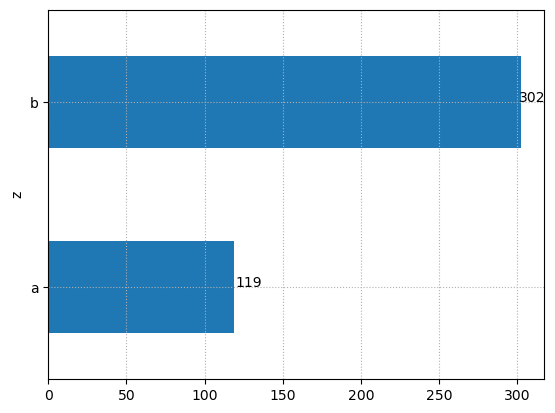

In [34]:
ax = df1.groupby(["z"])["z"].count().plot(kind="barh")
ax.text(301,1, z_values.to_dict()["b"])
ax.text(120,0, z_values.to_dict()["a"])
ax.grid(ls=":")

In [35]:
from sklearn.naive_bayes import GaussianNB

In [36]:
X = df1[["x","y"]]
y = df1["z"].replace({'a':0,'b':1})

In [49]:
mdl = GaussianNB()
mdl_fit = mdl.fit(X,y)

In [50]:
from sklearn.model_selection import cross_val_score

In [51]:
scores = cross_val_score(mdl,X,y,cv=100)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.92 accuracy with a standard deviation of 0.13


## Gaussian model

In [54]:
from sklearn.model_selection import ShuffleSplit

n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=5, test_size=0.32, random_state=42)
scores = cross_val_score(mdl, X, y, cv=cv)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

0.89 accuracy with a standard deviation of 0.03


## Curve ROC

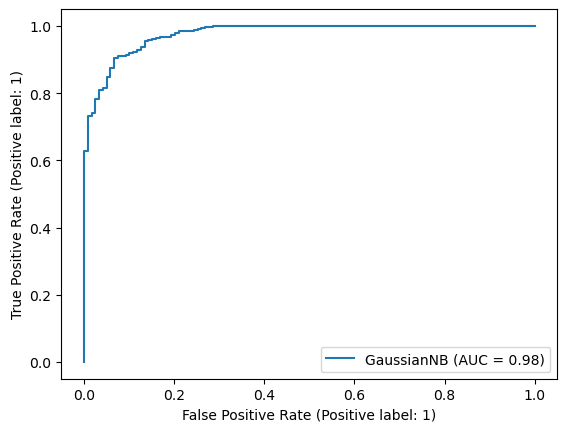

In [55]:
from sklearn.metrics import RocCurveDisplay

svc_disp = RocCurveDisplay.from_estimator(mdl_fit, X, y)
plt.show()